In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
players = pd.read_csv('players_22.csv')

C:\Users\Hp\AppData\Local\Temp\ipykernel_11396\2731654625.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('players_22.csv')


In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ['overall', 'potential', 'age', 'wage_eur', 'value_eur']


In [5]:
players1 = players[features]
players1.head()

,overall,potential,age,wage_eur,value_eur
0,93,93,34,320000.0,78000000.0
1,92,92,32,270000.0,119500000.0
2,91,91,36,270000.0,45000000.0
3,91,91,29,270000.0,129000000.0
4,91,91,30,350000.0,125500000.0


In [6]:
players1.shape


(19239, 5)

In [7]:
data = players1.copy()

In [8]:
data.dropna(inplace=True)
data.head()

,overall,potential,age,wage_eur,value_eur
0,93,93,34,320000.0,78000000.0
1,92,92,32,270000.0,119500000.0
2,91,91,36,270000.0,45000000.0
3,91,91,29,270000.0,129000000.0
4,91,91,30,350000.0,125500000.0


In [9]:
data.shape

(19165, 5)

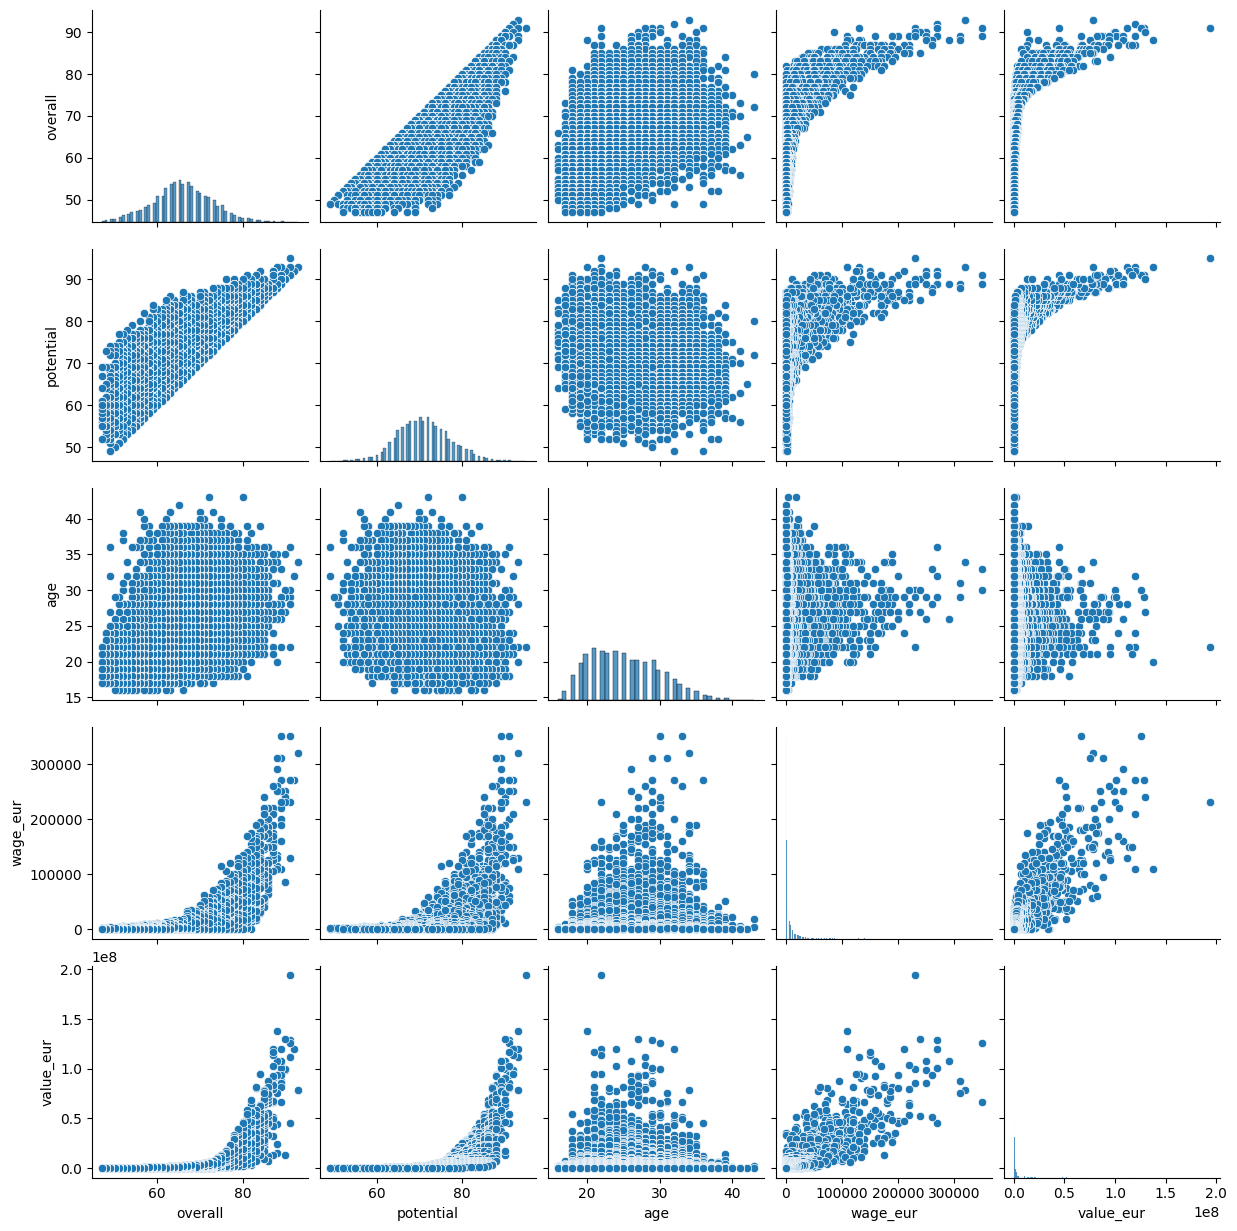

In [10]:
sns.pairplot(data[['overall', 'potential', 'age', 'wage_eur', 'value_eur']])

Text(0.5, 1.0, 'Potential and Age')

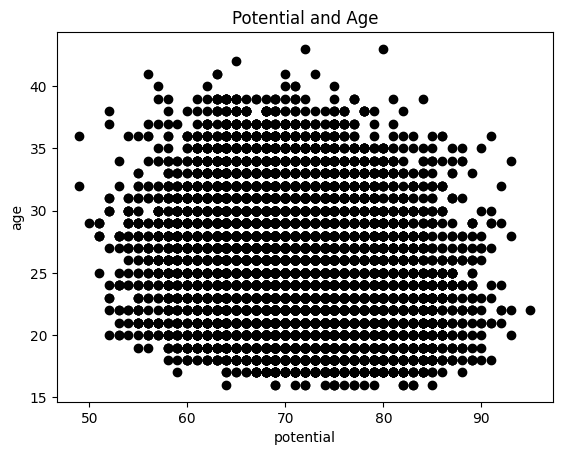

In [11]:
plt.scatter(data.potential, data.age, color='black')

plt.xlabel('potential')
plt.ylabel('age')
plt.title('Potential and Age')


In [12]:
data.describe()

,overall,potential,age,wage_eur,value_eur
count,19165.000000,19165.000000,19165.000000,19165.000000,1.916500e+04
mean,65.760188,71.079990,25.190034,9021.721889,2.850452e+06
std,6.882803,6.087721,4.727515,19476.005074,7.613700e+06
min,47.000000,49.000000,16.000000,500.000000,9.000000e+03
25%,61.000000,67.000000,21.000000,1000.000000,4.750000e+05
50%,66.000000,71.000000,25.000000,3000.000000,9.750000e+05
75%,70.000000,75.000000,29.000000,8000.000000,2.000000e+06
max,93.000000,95.000000,43.000000,350000.000000,1.940000e+08


In [13]:
print(data.isnull().sum()) #check null value in columns


overall      0
potential    0
age          0
wage_eur     0
value_eur    0
dtype: int64


In [14]:
scaler = StandardScaler()

In [15]:
data[['overall', 'potential', 'age', 'wage_eur', 'value_eur']] = scaler.fit_transform(data[['overall', 'potential', 'age', 'wage_eur', 'value_eur']])

In [16]:
data.describe() #look at the previous data.describe() result you can see difference

,overall,potential,age,wage_eur,value_eur
count,1.916500e+04,1.916500e+04,1.916500e+04,1.916500e+04,19165.000000
mean,6.643843e-16,-9.491205e-17,-3.321922e-16,4.745602e-17,0.000000
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026
min,-2.725732e+00,-3.627066e+00,-1.943997e+00,-4.375612e-01,-0.373212
25%,-6.916240e-01,-6.702174e-01,-8.863310e-01,-4.118879e-01,-0.312005
50%,3.484313e-02,-1.313984e-02,-4.019847e-02,-3.091948e-01,-0.246332
75%,6.160168e-01,6.439377e-01,8.059341e-01,-5.246192e-02,-0.111703
max,3.957766e+00,3.929325e+00,3.767398e+00,1.750807e+01,25.106655


# KMeans Cluster

In [17]:
np.random.seed(42)  # Set a random seed for reproducibility and it help make standard of data0, data1 index values, otherwise it change if we don't use

In [18]:
km = KMeans(n_clusters=8)
km.fit(data[['potential','age']])
data['new_cluster'] = km.predict(data[['potential','age']])
data.head()


C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,overall,potential,age,wage_eur,value_eur,new_cluster
0,3.957766,3.600787,1.863600,15.967668,9.870564,0
1,3.812472,3.436517,1.440533,13.400340,15.321406,3
2,3.667179,3.272248,2.286666,13.400340,5.536158,0
3,3.667179,3.272248,0.805934,13.400340,16.569190,3
4,3.667179,3.272248,1.017467,17.508066,16.109480,3


In [19]:
data0 = data[data.new_cluster == 0]
data0.head()

,overall,potential,age,wage_eur,value_eur,new_cluster
0,3.957766,3.600787,1.863600,15.967668,9.870564,0
2,3.667179,3.272248,2.286666,13.400340,5.536158,0
7,3.521885,3.107978,2.075133,3.952571,1.398771,0
11,3.376592,2.943709,1.652067,17.508066,8.294416,0
22,3.231299,2.779440,2.075133,5.441621,2.777900,0


Text(0.5, 1.0, 'Potential and Age')

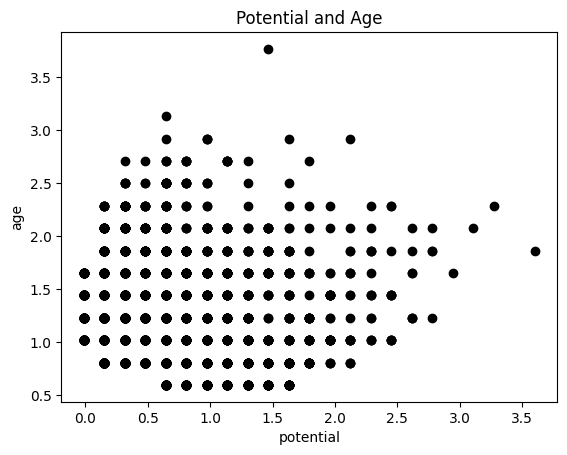

In [20]:
plt.scatter(data0.potential, data0.age, color='black')

plt.xlabel('potential')
plt.ylabel('age')
plt.title('Potential and Age')


In [21]:
centroids = km.cluster_centers_
centroids

array([[ 0.69128905,  1.27322169],
       [ 0.38403731, -0.04715026],
       [-0.62218631,  0.50943307],
       [ 1.71681476, -0.6659294 ],
       [-0.62180171, -0.82584195],
       [ 0.49566296, -1.12193994],
       [-1.7442766 ,  0.28177826],
       [-0.82750418,  1.68319135]])

In [22]:
data0.shape

(1856, 6)

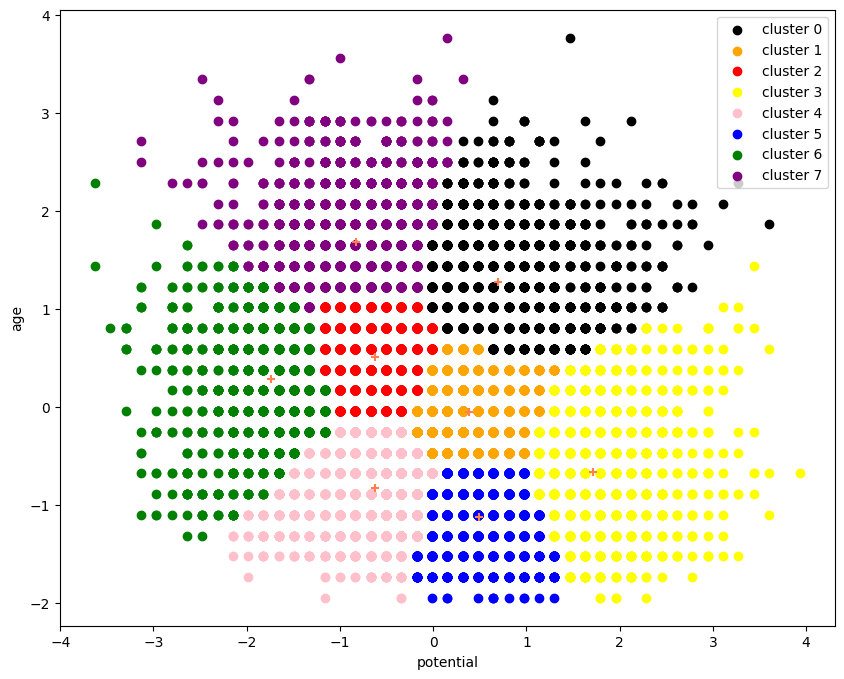

In [23]:
data0 = data[data.new_cluster == 0]
data1 = data[data.new_cluster == 1]
data2 = data[data.new_cluster == 2]
data3 = data[data.new_cluster == 3]
data4 = data[data.new_cluster == 4]
data5 = data[data.new_cluster == 5]
data6 = data[data.new_cluster == 6]
data7 = data[data.new_cluster == 7]

plt.figure(figsize=(10,8))

plt.scatter(data0.potential, data0.age, color='black', label = 'cluster 0')
plt.scatter(data1.potential, data1.age, color='orange', label = 'cluster 1')
plt.scatter(data2.potential, data2.age, color='red', label = 'cluster 2')
plt.scatter(data3.potential, data3.age, color='yellow', label = 'cluster 3')
plt.scatter(data4.potential, data4.age, color='pink', label = 'cluster 4')
plt.scatter(data5.potential, data5.age, color='blue', label = 'cluster 5')
plt.scatter(data6.potential, data6.age, color='green', label = 'cluster 6')
plt.scatter(data7.potential, data7.age, color='purple', label = 'cluster 7')

plt.scatter(centroids[:,0], centroids[:,1], marker='+', color='coral')

plt.xlabel('potential')
plt.ylabel('age')
plt.legend()
plt.show()

In [24]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn.cluster._kmeans')

wcss = []

cluster_range = range(1,11)
for k in cluster_range:
    km1 = KMeans(n_clusters= k)
    km1.fit(data[['potential','age']])
    wcss.append(km1.inertia_)
wcss

[38329.99999999987,
 21810.936229072307,
 15540.58890558656,
 12043.660527724067,
 10092.540459157915,
 8676.734083600186,
 7527.972956111615,
 6641.6129027269635,
 6042.207714471284,
 5469.79704627513]

In [25]:
data['new_cluster1'] = km1.predict(data[['potential','age']])
data.head()

,overall,potential,age,wage_eur,value_eur,new_cluster,new_cluster1
0,3.957766,3.600787,1.863600,15.967668,9.870564,0,8
1,3.812472,3.436517,1.440533,13.400340,15.321406,3,8
2,3.667179,3.272248,2.286666,13.400340,5.536158,0,8
3,3.667179,3.272248,0.805934,13.400340,16.569190,3,8
4,3.667179,3.272248,1.017467,17.508066,16.109480,3,8


In [26]:
centroids1 = km1.cluster_centers_
centroids1

array([[-0.22409219, -1.01645364],
       [ 0.45170757,  1.37842372],
       [-1.78164692,  0.63006403],
       [ 0.70222473, -1.02021273],
       [-0.64335429,  0.54041402],
       [ 1.75245362, -0.99147449],
       [-1.12673822, -0.61787718],
       [ 0.25829844, -0.01781363],
       [ 1.63063066,  0.30799933],
       [-0.82997039,  1.72591383]])

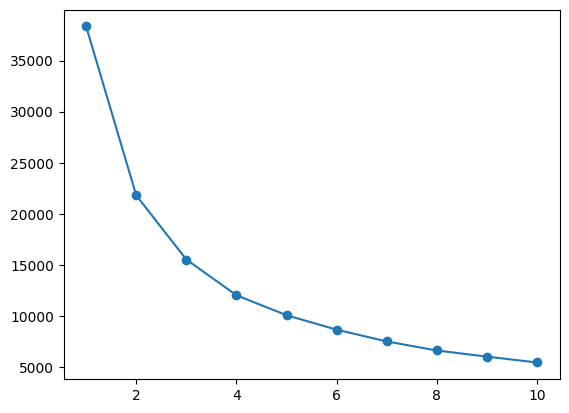

In [27]:
plt.plot(cluster_range, wcss, marker='o')

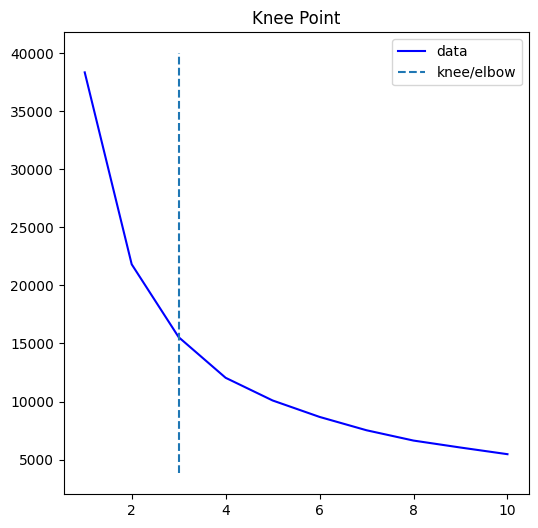

In [28]:
from kneed import KneeLocator
kn = KneeLocator(cluster_range, wcss, curve='convex', direction='decreasing')
kn.plot_knee()

In [29]:
kn.knee

3

In [30]:
km2 = KMeans(n_clusters=3)
km2.fit(data[['potential','age']])
data['optimize_cluster'] = km2.predict(data[['potential','age']])
data.head()

,overall,potential,age,wage_eur,value_eur,new_cluster,new_cluster1,optimize_cluster
0,3.957766,3.600787,1.863600,15.967668,9.870564,0,8,0
1,3.812472,3.436517,1.440533,13.400340,15.321406,3,8,0
2,3.667179,3.272248,2.286666,13.400340,5.536158,0,8,0
3,3.667179,3.272248,0.805934,13.400340,16.569190,3,8,0
4,3.667179,3.272248,1.017467,17.508066,16.109480,3,8,0


In [31]:
centroids2 = km2.cluster_centers_
centroids2

array([[ 1.06180024, -0.58612214],
       [-0.49146311,  1.10498052],
       [-0.53435116, -0.5809099 ]])

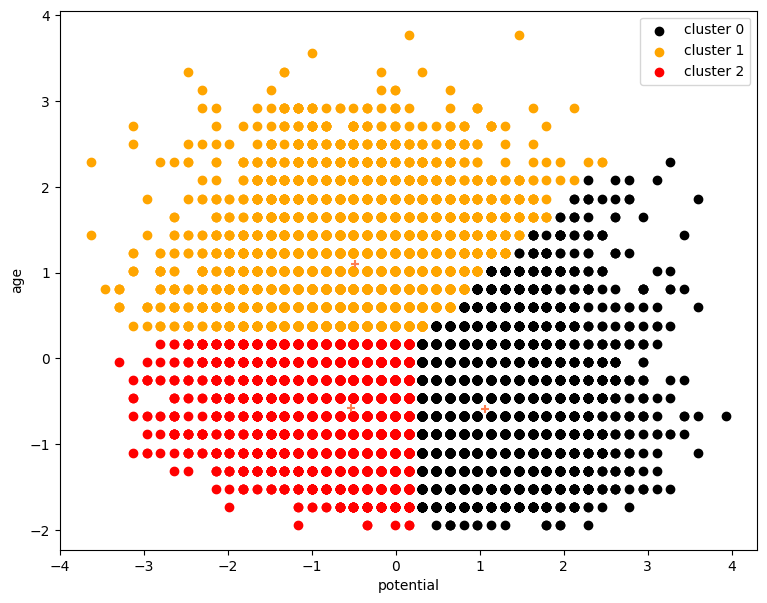

In [32]:
data0 = data[data.optimize_cluster == 0]
data1 = data[data.optimize_cluster == 1]
data2 = data[data.optimize_cluster == 2]

plt.figure(figsize=(9,7))

plt.scatter(data0.potential, data0.age, color='black', label = 'cluster 0')
plt.scatter(data1.potential, data1.age, color='orange', label = 'cluster 1')
plt.scatter(data2.potential, data2.age, color='red', label = 'cluster 2')

plt.scatter(centroids2[:,0], centroids2[:,1], marker='+', color='coral')

plt.xlabel('potential')
plt.ylabel('age')
plt.legend()
plt.show()

In [33]:
data0 = data[data.optimize_cluster == 0].shape
data0

(6238, 8)

In [34]:
data1 = data[data.optimize_cluster == 1].shape

In [35]:
data1

(6623, 8)

In [36]:
data2 = data[data.optimize_cluster == 2].shape
data2

(6304, 8)

In [37]:
km2.predict(data[['potential','age']])

array([0, 0, 0, ..., 2, 2, 2])